In [1]:
# for multivariate linear regression with feature scaling
import pandas as pd
import numpy as np
import math
import copy
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
def compute_cost(x,y,w,b):
    m=x.shape[0]
    cost=0.0
    for i in range(m):
        f_wb_i = np.dot(x,w) + b
        cost = cost + (f_wb_i - y[i])**2
    cost = cost/(2*m)
    return cost
    

In [3]:
def compute_gradient(x,y,w,b):
    m,n=x.shape
    dj_dw=np.zeros((n,), dtype=object)
    dj_db=0
    for i in range(m):
        err = (np.dot(w,x[i]) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j]+ (err * x[i,j])
        dj_db = dj_db + err
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    return dj_dw, dj_db

In [4]:
def gradient_descent(x,y,w_in,b_in,a,num_iters):
    J_hist=[]
    w=copy.deepcopy(w_in)
    b=b_in
    for i in range(num_iters):
        dj_dw,dj_db = compute_gradient(x,y,w,b)
        w = w - np.dot(a,dj_dw)
        b = b - np.dot(a,dj_db)
        if i%100==0:
            print(f'iteration: {i}, w={w//100000}, b={b//1000}')
    return w,b

In [5]:
def z_score_normalization(x):
    mu = np.mean(x, axis = 0)
    sigma = np.std(x, axis = 0)
    x_norm = (x-mu)/sigma
    return x_norm

In [7]:
df = pd.read_csv(r"Daegu_Real_Estate_data.csv")

In [8]:
df2 = df.drop_duplicates()
df2.replace(' -  ', 0,  inplace=True)
df2.replace(np.nan,0, inplace=True)
df2 = df.drop(['HallwayType','HeatingType','AptManageType','TimeToBusStop','TimeToSubway','SubwayStation'], axis=1)
for column in df2.columns:
    if df2[column].dtype == 'float64':
        df2[column] = df2[column].astype(np.int64)

C:\Users\Daiyan Khan\AppData\Local\Temp\ipykernel_6584\3330797609.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.replace(' -  ', 0,  inplace=True)
C:\Users\Daiyan Khan\AppData\Local\Temp\ipykernel_6584\3330797609.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.replace(np.nan,0, inplace=True)


In [9]:
y=df2['SalePrice'].values

In [10]:
df2=df2.drop(['SalePrice','N_SchoolNearBy(Total)','N_FacilitiesNearBy(Total)','N_elevators','N_manager'],axis=1)
x=df2.values
r,c=x.shape
x1=df2['Size(sqf)']

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   YearBuilt                           5891 non-null   int64
 1   YrSold                              5891 non-null   int64
 2   MonthSold                           5891 non-null   int64
 3   Size(sqf)                           5891 non-null   int64
 4   Floor                               5891 non-null   int64
 5   N_Parkinglot(Ground)                5891 non-null   int64
 6   N_Parkinglot(Basement)              5891 non-null   int64
 7   N_APT                               5891 non-null   int64
 8   N_FacilitiesNearBy(PublicOffice)    5891 non-null   int64
 9   N_FacilitiesNearBy(Hospital)        5891 non-null   int64
 10  N_FacilitiesNearBy(Dpartmentstore)  5891 non-null   int64
 11  N_FacilitiesNearBy(Mall)            5891 non-null   int64
 12  N_Faci

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, train_size=0.5, shuffle=True)

In [13]:
x_train=z_score_normalization(x_train)
y_train=z_score_normalization(y_train)
x_test=z_score_normalization(x_test)
y_test=z_score_normalization(y_test)

In [14]:
np.set_printoptions(precision=5)
m,n=x_train.shape
a=0.00000001
w=np.zeros((n,))
b=0
num_iters=1000
w,b=gradient_descent(x_train,y_train,w,b,a,num_iters)
print(f'done, the value are w,b={w//100},{b}')

iteration: 0, w=[0.0 0.0 0.0 0.0 0.0 -1.0 0.0 0.0 -1.0 -1.0 0.0 0.0 -1.0 0.0 -1.0 -1.0
 -1.0 -1.0 0.0], b=0.0
iteration: 100, w=[0.0 0.0 0.0 0.0 0.0 -1.0 0.0 0.0 -1.0 -1.0 0.0 0.0 -1.0 0.0 -1.0 -1.0
 -1.0 -1.0 0.0], b=-1.0
iteration: 200, w=[0.0 0.0 0.0 0.0 0.0 -1.0 0.0 0.0 -1.0 -1.0 0.0 0.0 -1.0 0.0 -1.0 -1.0
 -1.0 -1.0 0.0], b=-1.0
iteration: 300, w=[0.0 0.0 0.0 0.0 0.0 -1.0 0.0 0.0 -1.0 -1.0 0.0 0.0 -1.0 0.0 -1.0 -1.0
 -1.0 -1.0 0.0], b=-1.0
iteration: 400, w=[0.0 0.0 0.0 0.0 0.0 -1.0 0.0 0.0 -1.0 -1.0 0.0 0.0 -1.0 0.0 -1.0 -1.0
 -1.0 -1.0 0.0], b=-1.0
iteration: 500, w=[0.0 0.0 0.0 0.0 0.0 -1.0 0.0 0.0 -1.0 -1.0 0.0 0.0 -1.0 0.0 -1.0 -1.0
 -1.0 -1.0 0.0], b=-1.0
iteration: 600, w=[0.0 0.0 0.0 0.0 0.0 -1.0 0.0 0.0 -1.0 -1.0 0.0 0.0 -1.0 0.0 -1.0 -1.0
 -1.0 -1.0 0.0], b=-1.0
iteration: 700, w=[0.0 0.0 0.0 0.0 0.0 -1.0 0.0 0.0 -1.0 -1.0 0.0 0.0 -1.0 0.0 -1.0 -1.0
 -1.0 -1.0 0.0], b=-1.0
iteration: 800, w=[0.0 0.0 0.0 0.0 0.0 -1.0 0.0 0.0 -1.0 -1.0 0.0 0.0 -1.0 0.0 -1.0 -1.0
 -1.0 -1.0

In [15]:
def predict(x,w,b):
    m,n=x.shape
    f=np.zeros((m,))
    x_temp=copy.deepcopy(x)
    for i in range(m):
        x_temp[i,4]=x[i,4]**3
        x_temp[i,18]=x[i,18]**3
        x_temp[i,0]=x[i,0]**0.15
        x_temp[i,1]=x[i,1]**0.5
        f[i]=np.dot(x_temp[i],w)+b
    return f

[         nan -1.43225e-05          nan ...  2.61860e-05 -1.54038e-05
          nan]


C:\Users\Daiyan Khan\AppData\Local\Temp\ipykernel_6584\2395785205.py:9: RuntimeWarning: invalid value encountered in double_scalars
  x_temp[i,1]=x[i,1]**0.5
C:\Users\Daiyan Khan\AppData\Local\Temp\ipykernel_6584\2395785205.py:8: RuntimeWarning: invalid value encountered in double_scalars
  x_temp[i,0]=x[i,0]**0.15


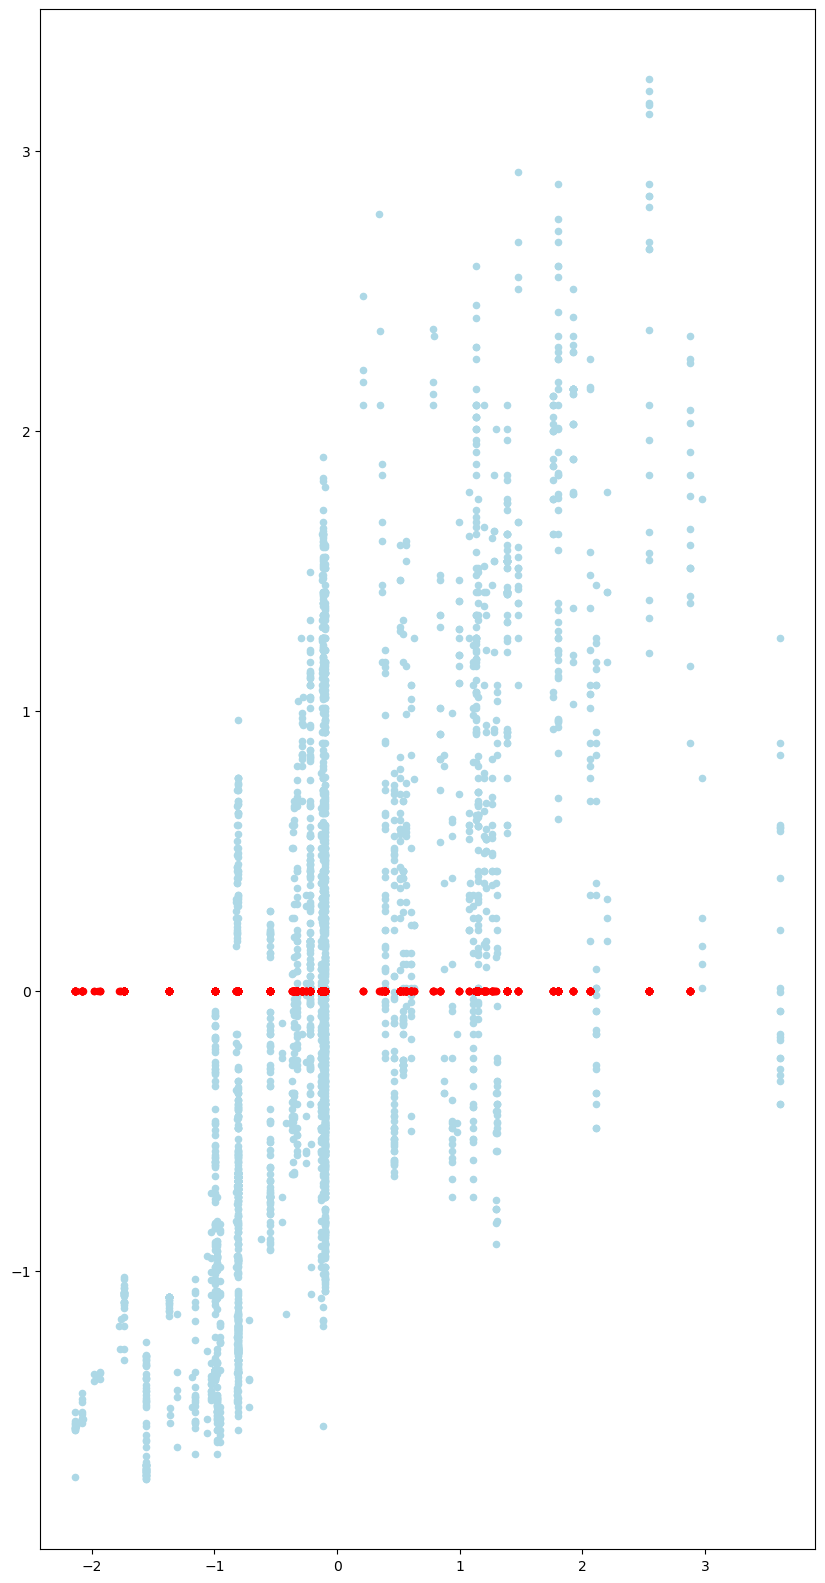

In [16]:
plt.figure(figsize=(10,20))
plt.scatter(x_train[:,3],y_train,20,color='lightblue')
y_pred=predict(x_train,w,b)
print(y_pred)
plt.scatter(x_train[:,3],y_pred,20, color='red')

In [17]:
from sklearn import metrics
y_pred=predict(x_test,w,b)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

C:\Users\Daiyan Khan\AppData\Local\Temp\ipykernel_6584\2395785205.py:8: RuntimeWarning: invalid value encountered in double_scalars
  x_temp[i,0]=x[i,0]**0.15
C:\Users\Daiyan Khan\AppData\Local\Temp\ipykernel_6584\2395785205.py:9: RuntimeWarning: invalid value encountered in double_scalars
  x_temp[i,1]=x[i,1]**0.5


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').